# EDA:
***
***

### Importar librerias

In [4]:
# Se cargan las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import folium
from folium.plugins import MarkerCluster

***
### Configuracion Visual observar completos los DataFrame

In [5]:
# Seteo para ver completamenta las columnas y las filas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)


***
### Lectura y asignacion de Variable

In [6]:
# Se carga el Excel en DataFrame en una Variable
hechos = pd.read_excel('Data/hechos_comuna_habitantes.xlsx')

In [7]:
# Se carga el Excel en DataFrame en una Variable
Victimas = pd.read_excel('Data/victimas_limpio.xlsx')

In [8]:
# Visualizacion general y de las variables
hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Id                     696 non-null    object        
 1   N°_Victimas            696 non-null    int64         
 2   Fecha_Hechos           696 non-null    datetime64[ns]
 3   Año_Hechos             696 non-null    int64         
 4   Mes_Hechos             696 non-null    int64         
 5   Dia_Hechos             696 non-null    int64         
 6   Hora_Completa_Hechos   695 non-null    datetime64[ns]
 7   Hora_Hechos            696 non-null    object        
 8   Lugar_Del_Hecho        696 non-null    object        
 9   Tipo_De_Calle          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [9]:
# Visualizar los 5 primeros registros
hechos.head()

,Id,N°_Victimas,Fecha_Hechos,Año_Hechos,Mes_Hechos,Dia_Hechos,Hora_Completa_Hechos,Hora_Hechos,Lugar_Del_Hecho,Tipo_De_Calle,Calle,Altura,Cruce,Dirección Normalizada,Comuna,Barrios,Poblacion,Geo_Localizacion,Longitud,Latitud,Participantes,Victima,Acusado
0,2016-0001,1,2016-01-01,2016,1,1,1900-01-01 04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI,226649.0,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,1900-01-01 01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,LINIERS - MATADEROS - PARQUE AVELLANEDA,170605.0,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,1900-01-01 07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,2034.0,NaN,ENTRE RIOS AV. 2034,1,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RETIRO - SAN NICOLAS - SAN TELMO,253271.0,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,1900-01-01 00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI,226649.0,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,1900-01-01 05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RETIRO - SAN NICOLAS - SAN TELMO,253271.0,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS


In [10]:
# Visualizacion general y de las variables
Victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id_Hecho             717 non-null    object        
 1   Fecha_Hecho          717 non-null    datetime64[ns]
 2   Año_Hecho            717 non-null    int64         
 3   Mes_Hecho            717 non-null    int64         
 4   Dia_Hecho            717 non-null    int64         
 5   Rol_Victima          717 non-null    object        
 6   Victima              717 non-null    object        
 7   Sexo                 717 non-null    object        
 8   Edad                 717 non-null    object        
 9   Fecha_Fallecimiento  648 non-null    datetime64[ns]
 10  Año_Fallecimiento    648 non-null    float64       
 11  Mes_Fallecimiento    648 non-null    float64       
 12  Dia_Fallecimiento    648 non-null    float64       
dtypes: datetime64[ns](2), float64(3), i

In [11]:
# Visualizar los 5 primeros registros
Victimas.head()

,Id_Hecho,Fecha_Hecho,Año_Hecho,Mes_Hecho,Dia_Hecho,Rol_Victima,Victima,Sexo,Edad,Fecha_Fallecimiento,Año_Fallecimiento,Mes_Fallecimiento,Dia_Fallecimiento
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01,2016.0,1.0,1.0
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02,2016.0,1.0,2.0
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03,2016.0,1.0,3.0
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,NaT,NaN,NaN,NaN
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01,2016.0,2.0,1.0


***
### Diccionario y Descripcion de las columnas del DataFrame hechos

In [12]:
# Se carga el Excel en DataFrame en una Variable
diccionario_hechos = pd.read_excel('Data/diccionario_hechos.xlsx')

In [13]:
# Descripcion de las columnas
diccionario_hechos[['variables y definiciones', 'descripción']].head(21)

,variables y definiciones,descripción
0,ID,identificador unico del siniestro
1,N_VICTIMAS,cantidad de víctimas
2,FECHA,fecha en formato dd/mm/aaaa
3,AAAA,año
4,MM,mes
5,DD,día del mes
6,HORA,hora del siniestro
7,HH,franja horaria entera
8,LUGAR_DEL_HECHO,Dirección del hecho
9,TIPO_DE_CALLE,Tipo de arteria. En el caso de intersecciones a nivel se clasifica según la de mayor jerarquía


In [14]:
# Descripcion de las columnas
diccionario_hechos[['Variables', 'valores', 'descripción.1']]

,Variables,valores,descripción.1
0,TIPO_DE_CALLE,calle,Arteria cuya calzada tiene un ancho comprendido entre cinco (5) y trece (13) metros. Inlcluye pasajes.
1,TIPO_DE_CALLE,avenida,Arteria cuya calzada tiene un ancho total de por lo menos trece (13) metros.
2,TIPO_DE_CALLE,autopista,"Vía multicarril con calzadas para ambas manos separadas físicamente, sin cruces a nivel, con accesos controlados y sin ingreso directo desde los predios frentistas lindantes. Incluye AU 25 de mayo, AU Perito Moreno, AU Dellepiane, Av Lugones, Av. Cantilo, AU Frondizi, AU Buenos Aires - La Plata en el tramo que circula dentro de la Ciudad de Buenos Aires y Paseo del Bajo. Incluye ingresos y egresos de las mismas y distribuidores."
3,TIPO_DE_CALLE,general paz,"Avenida General Paz, ambos sentidos. Incluye ingresos y egresos de las mismas, distribuidores y calle colectora."
4,VICTIMA,PEATON,"Víctima distinta de cualquier ocupante de un vehículo, ya sea un conductor/a o un pasajero/a. Se incluyen los ocupantes o personas que empujan o arrastran un coche de bebé o una silla de ruedas o cualquier otro vehículo sin motor de pequeñas dimensiones. Se incluyen también las personas que caminan empujando una bicicleta o un ciclomotor."
5,VICTIMA,MOTO,"Vehículo a motor no carrozado que incluye motocicleta, ciclomotor y cuatriciclo."
6,VICTIMA,AUTO,"Vehículo a motor destinado al transporte de personas, diferente de los motovehículos, y que tenga hasta nueve plazas (incluyendo al asiento del conductor) (Sedan, SUV, coupe, etc)"
7,VICTIMA,CARGAS,"Vehículo a motor destiando al transporte de cargas, incluye camiones pesados (con o sin acoplado o semirremolque, etc., camión de recolección de residuos) y livianos (utilitarios, furgonetas, pick-ups, camioneta con caja de carga)."
8,VICTIMA,BICICLETA,"Vehículo con al menos dos ruedas, que generalmente es accionado por el esfuerzo muscular de las personas que lo ocupan, en particular mediante pedales o manivelas. Incluye bicicletas de pedaleo asistido y/o con motor"
9,VICTIMA,PASAJEROS,"Personas lesionadas que se encuentran dentro, descendiendo o ascendiendo de las unidades de autotrasporte público de pasajeros/as y ómnibus de larga distancia"


***
### Descripcion de las columnas del DataFrame Victimas

In [15]:
# Se carga el Excel en DataFrame en una Variable
diccionario_victimas = pd.read_excel('Data/diccionario_victimas.xlsx')

In [16]:
# Visualizacion el diccionario
diccionario_victimas

,variables y definiciones,descripción,Variables,valores,descripción.1
0,ID_hecho,identificador unico del siniestro,VICTIMA,PEATON,"Víctima distinta de cualquier ocupante de un vehículo, ya sea un conductor/a o un pasajero/a. Se incluyen los ocupantes o personas que empujan o arrastran un coche de bebé o una silla de ruedas o cualquier otro vehículo sin motor de pequeñas dimensiones. Se incluyen también las personas que caminan empujando una bicicleta o un ciclomotor."
1,FECHA,fecha en formato dd/mm/aaaa,VICTIMA,MOTO,"Vehículo a motor no carrozado que incluye motocicleta, ciclomotor y cuatriciclo."
2,AAAA,año,VICTIMA,AUTO,"Vehículo a motor destinado al transporte de personas, diferente de los motovehículos, y que tenga hasta nueve plazas (incluyendo al asiento del conductor) (Sedan, SUV, coupe, etc)"
3,MM,mes,VICTIMA,CARGAS,"Vehículo a motor destiando al transporte de cargas, incluye camiones pesados (con o sin acoplado o semirremolque, etc., camión de recolección de residuos) y livianos (utilitarios, furgonetas, pick-ups, camioneta con caja de carga)."
4,DD,día del mes,VICTIMA,BICICLETA,"Vehículo con al menos dos ruedas, que generalmente es accionado por el esfuerzo muscular de las personas que lo ocupan, en particular mediante pedales o manivelas. Incluye bicicletas de pedaleo asistido y/o con motor"
5,ROL,Posición relativa al vehículo que presentaba la víctima en el momento del siniestro,VICTIMA,PASAJEROS,"Personas lesionadas que se encuentran dentro, descendiendo o ascendiendo de las unidades de autotrasporte público de pasajeros/as y ómnibus de larga distancia"
6,VICTIMA,"Vehículo que ocupaba quien haya fallecido a se haya lastimado a raíz del hecho, o bien peatón/a. Clasificación agregada del tipo de vehículos.",VICTIMA,MOVIL,"Vehículos de emergencia: móviles policiales, ambulancias, autobombas."
7,SEXO,Sexo informado por fuente policial de la víctima,VICTIMA,OTRO,otros vehiculos
8,EDAD,Edad de la víctima al momento del siniestro,VICTIMA,SD,Sin datos sobre el tipo de víctima
9,FECHA_FALLECIMIENTO,Fecha de fallecimiento de la víctima,NaN,NaN,NaN


In [17]:
# Descripcion de las columnas
diccionario_victimas[['variables y definiciones', 'descripción']]

,variables y definiciones,descripción
0,ID_hecho,identificador unico del siniestro
1,FECHA,fecha en formato dd/mm/aaaa
2,AAAA,año
3,MM,mes
4,DD,día del mes
5,ROL,Posición relativa al vehículo que presentaba la víctima en el momento del siniestro
6,VICTIMA,"Vehículo que ocupaba quien haya fallecido a se haya lastimado a raíz del hecho, o bien peatón/a. Clasificación agregada del tipo de vehículos."
7,SEXO,Sexo informado por fuente policial de la víctima
8,EDAD,Edad de la víctima al momento del siniestro
9,FECHA_FALLECIMIENTO,Fecha de fallecimiento de la víctima


In [18]:
# Descripcion de las columnas
diccionario_victimas[['Variables', 'valores', 'descripción.1']]

,Variables,valores,descripción.1
0,VICTIMA,PEATON,"Víctima distinta de cualquier ocupante de un vehículo, ya sea un conductor/a o un pasajero/a. Se incluyen los ocupantes o personas que empujan o arrastran un coche de bebé o una silla de ruedas o cualquier otro vehículo sin motor de pequeñas dimensiones. Se incluyen también las personas que caminan empujando una bicicleta o un ciclomotor."
1,VICTIMA,MOTO,"Vehículo a motor no carrozado que incluye motocicleta, ciclomotor y cuatriciclo."
2,VICTIMA,AUTO,"Vehículo a motor destinado al transporte de personas, diferente de los motovehículos, y que tenga hasta nueve plazas (incluyendo al asiento del conductor) (Sedan, SUV, coupe, etc)"
3,VICTIMA,CARGAS,"Vehículo a motor destiando al transporte de cargas, incluye camiones pesados (con o sin acoplado o semirremolque, etc., camión de recolección de residuos) y livianos (utilitarios, furgonetas, pick-ups, camioneta con caja de carga)."
4,VICTIMA,BICICLETA,"Vehículo con al menos dos ruedas, que generalmente es accionado por el esfuerzo muscular de las personas que lo ocupan, en particular mediante pedales o manivelas. Incluye bicicletas de pedaleo asistido y/o con motor"
5,VICTIMA,PASAJEROS,"Personas lesionadas que se encuentran dentro, descendiendo o ascendiendo de las unidades de autotrasporte público de pasajeros/as y ómnibus de larga distancia"
6,VICTIMA,MOVIL,"Vehículos de emergencia: móviles policiales, ambulancias, autobombas."
7,VICTIMA,OTRO,otros vehiculos
8,VICTIMA,SD,Sin datos sobre el tipo de víctima
9,NaN,NaN,NaN


***
### Descripcion de las columnas del DataFrame Clasificacion Victimas_Acusado

In [19]:
# Se carga el Excel en DataFrame en una Variable
Victimas_Acusado = pd.read_excel('Data/tipo_usuario_via.xlsx')

In [20]:
# Descripcion de las columnas
Victimas_Acusado[['Original_victima', 'LESIONES', 'FATALES INFORME ANUAL']].head(16)

,Original_victima,LESIONES,FATALES INFORME ANUAL
0,PEATON,PEATON,PEATON
1,PEATON,PEATON,PEATON
2,MOTO,MOTO,MOTO
3,AUTO,AUTO,AUTO
4,AUTO PARTICULAR,AUTO,AUTO
5,TAXI,TAXI,AUTO
6,TAXI/REMIS,TAXI,AUTO
7,CAMION,CAMION,CARGAS
8,TRANSPORTE DE CARGAS / GRUA,CAMION,CARGAS
9,UTILITARIO,CAMIONETA,CARGAS


In [21]:
# Descripcion de las columnas
Victimas_Acusado[['Original_acusado', 'LESIONES.1', 'FATALES INFORME ANUAL.1']]

,Original_acusado,LESIONES.1,FATALES INFORME ANUAL.1
0,TRANSPORTE PUBLICO,TRANSPORTE PUBLICO,PASAJEROS
1,SIN DATOS,SD,SIN DATOS
2,AUTO PARTICULAR,AUTO,AUTO
3,MOTO,MOTO,MOTO
4,CAMION,CAMION,CARGAS
5,UTILITARIO,CAMIONETA,CARGAS
6,TRANSPORTE DE CARGAS / GRUA / VOLQUETES,CAMION,CARGAS
7,TREN / FURGON,TREN,TREN
8,OMNIBUS / MINIBUS,TRANSPORTE PUBLICO,PASAJEROS
9,TAXI/REMIS,TAXI,AUTO


***
### Realiza la union de los dos DataFrame

In [22]:
# Realizar un merge entre 'hechos' y 'victimas'
eda = hechos.merge(Victimas, left_on='Id', right_on='Id_Hecho')


In [23]:
# Visualizacion general y de las variables luego del 'Merge'
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Id                     717 non-null    object        
 1   N°_Victimas            717 non-null    int64         
 2   Fecha_Hechos           717 non-null    datetime64[ns]
 3   Año_Hechos             717 non-null    int64         
 4   Mes_Hechos             717 non-null    int64         
 5   Dia_Hechos             717 non-null    int64         
 6   Hora_Completa_Hechos   716 non-null    datetime64[ns]
 7   Hora_Hechos            717 non-null    object        
 8   Lugar_Del_Hecho        717 non-null    object        
 9   Tipo_De_Calle          717 non-null    object        
 10  Calle                  716 non-null    object        
 11  Altura                 133 non-null    float64       
 12  Cruce                  540 non-null    object        
 13  Direc

In [24]:
# Visualizacion de los 5 primeros registros
eda.head()

,Id,N°_Victimas,Fecha_Hechos,Año_Hechos,Mes_Hechos,Dia_Hechos,Hora_Completa_Hechos,Hora_Hechos,Lugar_Del_Hecho,Tipo_De_Calle,Calle,Altura,Cruce,Dirección Normalizada,Comuna,Barrios,Poblacion,Geo_Localizacion,Longitud,Latitud,Participantes,Victima_x,Acusado,Id_Hecho,Fecha_Hecho,Año_Hecho,Mes_Hecho,Dia_Hecho,Rol_Victima,Victima_y,Sexo,Edad,Fecha_Fallecimiento,Año_Fallecimiento,Mes_Fallecimiento,Dia_Fallecimiento
0,2016-0001,1,2016-01-01,2016,1,1,1900-01-01 04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI,226649.0,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01,2016.0,1.0,1.0
1,2016-0002,1,2016-01-02,2016,1,2,1900-01-01 01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,LINIERS - MATADEROS - PARQUE AVELLANEDA,170605.0,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02,2016.0,1.0,2.0
2,2016-0003,1,2016-01-03,2016,1,3,1900-01-01 07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,2034.0,NaN,ENTRE RIOS AV. 2034,1,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RETIRO - SAN NICOLAS - SAN TELMO,253271.0,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03,2016.0,1.0,3.0
3,2016-0004,1,2016-01-10,2016,1,10,1900-01-01 00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI,226649.0,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,NaT,NaN,NaN,NaN
4,2016-0005,1,2016-01-21,2016,1,21,1900-01-01 05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RETIRO - SAN NICOLAS - SAN TELMO,253271.0,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01,2016.0,2.0,1.0


***
### Valores duplicados

In [25]:
# Se buscan los registros duplicados
valores_duplicados_total = eda.duplicated().sum()
print("Total de registros duplicados:", valores_duplicados_total)


Total de registros duplicados: 0


***
### Valores duplicados Nulos

In [26]:
# Se buscan los valores nulos en las columnas
valores_nulos_totales = eda.isna().sum()
print(f'Total de Valores Nulos del DataFrame: {valores_nulos_totales.sum()}\n')
print(f'Total de Valores Nulos por columna:')

for columna, cantidad in valores_nulos_totales.items():
    if cantidad > 0:
        print(f"{columna}: {cantidad}")

Total de Valores Nulos del DataFrame: 1072

Total de Valores Nulos por columna:
Hora_Completa_Hechos: 1
Calle: 1
Altura: 584
Cruce: 177
Dirección Normalizada: 9
Barrios: 2
Poblacion: 2
Longitud: 10
Latitud: 10
Fecha_Fallecimiento: 69
Año_Fallecimiento: 69
Mes_Fallecimiento: 69
Dia_Fallecimiento: 69


**Observaciones:**


- El DataFrame 'eda' tiene 717 registros y 36  columnas, el cual posee informacion sobre loa 'Sinistros viales' en la Ciudad de Buenos Aires entre los años 2016 y 2021. Las columnas brindan informacion sobre el incidente, la fecha, la victima, el acusado, ubicacion, participantes el mismo.

- La cantidad total de Nulos en el DataFrame es de 1125, distribuidos en 15 columnas, las cuales Fecha_Fallecimiento, Año_Fallecimiento, Mes_Fallecimiento, Dia_Fallecimiento, corresponden al mismo dato
Los'valores nulos' que no se pudieron rellenar en el ETL y el registro 'SD'(Sin Datos), que son registros que no se pudieron recolectar por las entidades encargadas.

***
### Eliminar columnas con informacion repetida

In [27]:
# Se eliman las columnas porque contienen informacion reiterativa
eda = eda.drop(columns={'Id_Hecho', 'Fecha_Hecho', 'Año_Hecho', 'Mes_Hecho', 'Dia_Hecho',
       'Victima_y'})

***
### Ordenar las columnas para mejor visualizacion

In [28]:
# Ordena las columnas 
columnas_ordenadas = ['Id', 'N°_Victimas', 'Fecha_Hechos', 'Año_Hechos', 'Mes_Hechos',
       'Dia_Hechos', 'Hora_Completa_Hechos', 'Hora_Hechos', 'Lugar_Del_Hecho',
       'Tipo_De_Calle', 'Calle', 'Altura', 'Cruce', 'Dirección Normalizada',
       'Comuna', 'Barrios', 'Poblacion', 'Geo_Localizacion', 'Longitud',
       'Latitud', 'Victima_x', 'Sexo', 'Edad', 'Rol_Victima', 'Acusado', 'Participantes', 'Fecha_Fallecimiento', 'Año_Fallecimiento',
       'Mes_Fallecimiento', 'Dia_Fallecimiento']
eda = eda[columnas_ordenadas]   

***
### Renombrar las columnas para mejor entendimiento

In [29]:
# Modificacion del nombre de la columna 'Victima_x'
eda = eda.rename(columns={'Victima_x': 'Victima'})

***
### Cambiar tipo de variable

In [30]:
# Convertir la columna 'Edad' a tipo numérico, manejar no números como NaN
eda['Edad'] = pd.to_numeric(eda['Edad'], errors='coerce')

# Convertir la columna 'Edad' a tipo entero
eda['Edad'] = eda['Edad'].astype('Int64') 

# Imprimir información sobre el cambio de tipo
print(eda[['Edad']].info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Edad    664 non-null    Int64
dtypes: Int64(1)
memory usage: 6.4 KB
None


***
# Analisis de Variables:


## Variables Numericas:

### 1- Numero de victimas

In [31]:
# Se genera una variable para obtener los datos estadisticos
var_num_numero_victimas = eda['N°_Victimas']
var_num_numero_victimas.describe()

count    717.000000
mean       1.061367
std        0.257024
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: N°_Victimas, dtype: float64

In [32]:
# Observar los subniveles que posee la variable
var_num_numero_victimas.value_counts()

N°_Victimas
1    676
2     38
3      3
Name: count, dtype: int64

In [33]:
# Calcular el total de Victimas de sisniesttros viales
numero_victimas = var_num_numero_victimas.sum()
print(f'El total de Victimas por sieniestros viales en la Ciudad de Buenos Aires es de : {numero_victimas}')

El total de Victimas por sieniestros viales en la Ciudad de Buenos Aires es de : 761


In [34]:
# Agrupar por Años para tener el total de victimas
eda.groupby('Año_Hechos')['N°_Victimas'].sum()


Año_Hechos
2016    150
2017    160
2018    161
2019    106
2020     87
2021     97
Name: N°_Victimas, dtype: int64

### Total de Victimas que se registro el fallecimiento

In [35]:
# Encontar valores nulos 
valores_nulos_victimas_fatales = eda['Fecha_Fallecimiento'].isna().sum()
print(f'Registros nulos de Fecha de Fallecimiento: {valores_nulos_victimas_fatales}')

Registros nulos de Fecha de Fallecimiento: 69


In [36]:
# Contar Total de Victimas Fatales con fecha registrada
victimas_fatales = eda[eda['Fecha_Fallecimiento'].notna()].shape[0]
print(f'La cantidad de Victimas Fatales con fecha registrada es de : {victimas_fatales}')

La cantidad de Victimas Fatales con fecha registrada es de : 648


In [37]:
# Agrupar  por 'Fecha_Fallecimiento' para conta el Toatl de victimas registradas
victimas_fatales = eda.groupby('Fecha_Fallecimiento')['N°_Victimas'].sum()

# Convertir a DataFrame
victimas_fatales_df = victimas_fatales.reset_index()

# Sumar la columna 'N°_Victimas'
total_victimas_fatales = victimas_fatales_df['N°_Victimas'].sum()

# Imprimir el resultado
print(f'Total de víctimas Fatales con registros: {total_victimas_fatales}')

#Visualizar los 5 primeros registros
victimas_fatales_df.head()


Total de víctimas Fatales con registros: 688


,Fecha_Fallecimiento,N°_Victimas
0,2016-01-01,1
1,2016-01-02,1
2,2016-01-03,1
3,2016-01-24,1
4,2016-01-26,1


**Observaciones:**


- La Variable 'N°_Victimas' posee 717 observaciones , todas tienen valores no nulos, siendo el Total de Victimas igual a 761 de las cuales se tiene  registradas como Fallecidas a un Total de 688. Quedan un total de 69 victimas como lesiones, ya que no se tiene dats del fallecimiento.
- La cantidad promedio de víctimas por siniestro es aproximadamente 1.06,
- La dispersión de los valores alrededor de la media por lo que se infiere que en la mayoría de los casos hubo una sola víctima.
- La cantidad máxima de víctimas por siniestro es 3, la cantidad mínima de víctimas por siniestro es 1.

### Porcentaje de la Distribucion del Numero de Victimas:

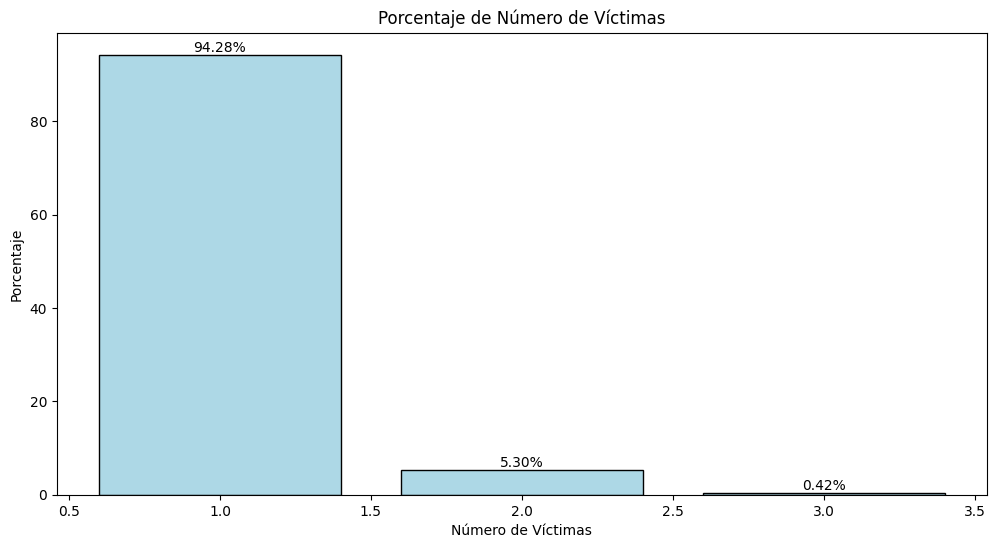

,N°_Victimas,Total de Víctimas,Porcentaje
0,1,676,94.281729
1,2,38,5.299861
2,3,3,0.418410


In [38]:
# Porcentaje de cada valor en la variable N°_Victimas
porcentaje_victimas = (eda['N°_Victimas'].value_counts() / len(eda)) * 100

# Crear un gráfico de barras con porcentajes
plt.figure(figsize=(12, 6))
bars = plt.bar(porcentaje_victimas.index, porcentaje_victimas, color='lightblue', edgecolor='black')

# Agregar etiquetas de porcentaje en las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

plt.title('Porcentaje de Número de Víctimas')
plt.xlabel('Número de Víctimas')
plt.ylabel('Porcentaje')
plt.show()

# Crear el DataFrame
df_porcentaje_numero_victimas = pd.DataFrame({'Total de Víctimas': eda['N°_Victimas'].value_counts(), 'Porcentaje': porcentaje_victimas})
df_porcentaje_numero_victimas.reset_index(inplace=True)

# Mostrar el DataFrame
df_porcentaje_numero_victimas

**Observaciones**:

- La gran mayoría de los incidentes (más del 94%) involucran a una única víctima, lo que indica que la mayoría de los siniestros viales registrados afectan a una sola persona.
- La presencia de siniestros viales con dos víctimas es significativa pero considerablemente menor en comparación con los incidentes con una sola víctima.
- Los casos de siniestros viales con tres víctimas son relativamente raros en comparación con los otros escenarios.

### Distribucion del Numero de Víctimas por Año:

In [39]:
# Se genera la variable de la distribucion por año de victimas
victimas_año = eda.groupby('Año_Hechos')['N°_Victimas'].sum().reset_index()
# Visualiza el DataFrame
victimas_año.head()

,Año_Hechos,N°_Victimas
0,2016,150
1,2017,160
2,2018,161
3,2019,106
4,2020,87


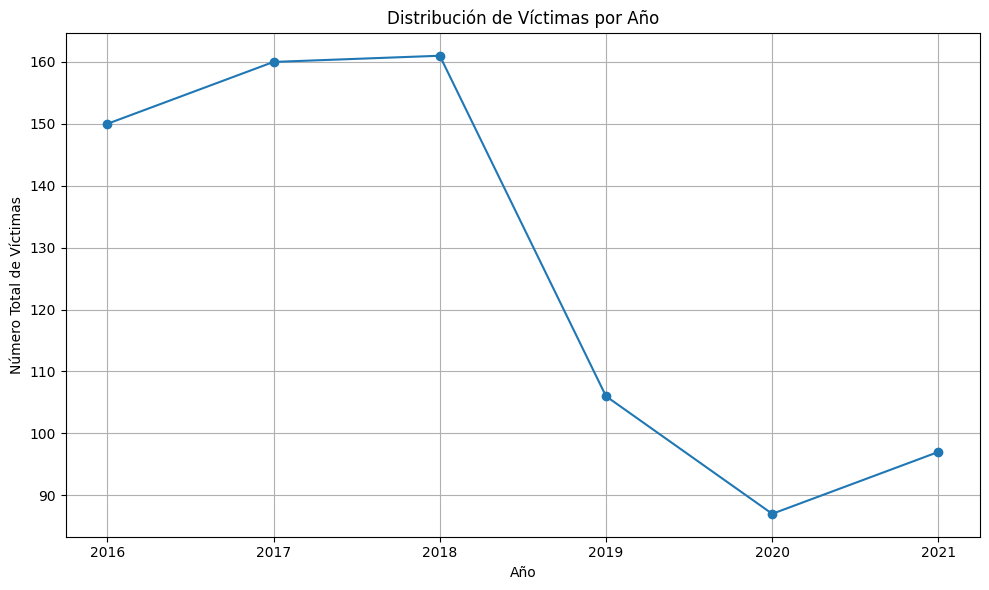

El numero Total de Victimas: 761


In [40]:
# Visualización de la distribución de víctimas por año
plt.figure(figsize=(10, 6))
plt.plot(victimas_año['Año_Hechos'], victimas_año['N°_Victimas'], marker='o', linestyle='-')

# Añadir títulos y etiquetas
plt.title('Distribución de Víctimas por Año')
plt.xlabel('Año')
plt.ylabel('Número Total de Víctimas')
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Numero total de Victimas
print(f'El numero Total de Victimas: {numero_victimas}')

**Observaciones:**

- La suma total de víctimas ha experimentado algunas variaciones a lo largo de los años es de 761.
- El año 2018 tiene la mayor suma total de víctimas (161), sugiriendo que fue un año con un mayor número de siniestros viales.
- El año 2020 tiene la menor suma total de víctimas (87), indicando que fue un año con un menor número de víctimas en comparación con otros años debido a la Pandemia producida por el COVID-19, lo que llevo al Aislamiento de loa ciudadanos.

### Distribucion de Víctimas por Mes:

In [41]:
# Crear variable con nombres de meses 
meses_nombres = {
    1: 'Enero',
    2: 'Febrero',
    3: 'Marzo',
    4: 'Abril',
    5: 'Mayo',
    6: 'Junio',
    7: 'Julio',
    8: 'Agosto',
    9: 'Septiembre',
    10: 'Octubre',
    11: 'Noviembre',
    12: 'Diciembre'
}

# Le asigna el nombre del mes a la nueva columna a cada numero de la columna Mes_Hechos
eda['Meses_Nombres_Hechos'] = eda['Mes_Hechos'].map(meses_nombres)

# Mostrar el DataFrame con la nueva columna
print(eda[['Mes_Hechos', 'Meses_Nombres_Hechos']])


     Mes_Hechos Meses_Nombres_Hechos
0             1                Enero
1             1                Enero
2             1                Enero
3             1                Enero
4             1                Enero
5             1                Enero
6             1                Enero
7             1                Enero
8             2              Febrero
9             2              Febrero
10            2              Febrero
11            2              Febrero
12            2              Febrero
13            2              Febrero
14            2              Febrero
15            2              Febrero
16            2              Febrero
17            2              Febrero
18            2              Febrero
19            2              Febrero
20            3                Marzo
21            3                Marzo
22            3                Marzo
23            3                Marzo
24            3                Marzo
25            3                Marzo
2

In [42]:
# Se agrupa por la cantidad de víctimas por mes
victimas_mes = eda.groupby(['Meses_Nombres_Hechos'])['N°_Victimas'].sum().reset_index()
victimas_mes

,Meses_Nombres_Hechos,N°_Victimas
0,Abril,56
1,Agosto,71
2,Diciembre,87
3,Enero,62
4,Febrero,65
5,Julio,51
6,Junio,58
7,Marzo,68
8,Mayo,60
9,Noviembre,70


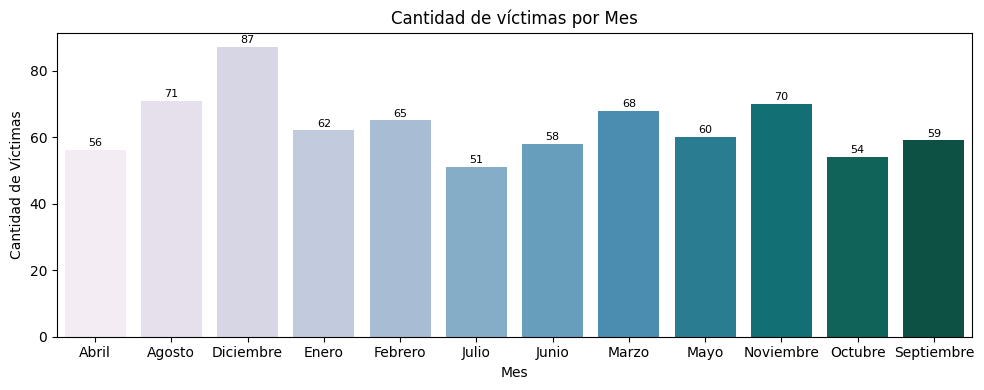

Meses ordenados de Mayor a Menor:

   Meses_Nombres_Hechos  N°_Victimas
2             Diciembre           87
1                Agosto           71
9             Noviembre           70
7                 Marzo           68
4               Febrero           65
3                 Enero           62
8                  Mayo           60
11           Septiembre           59
6                 Junio           58
0                 Abril           56
10              Octubre           54
5                 Julio           51

Top 3 de Meses con Mayor cantidad de Víctimas:

  Meses_Nombres_Hechos  N°_Victimas
0            Diciembre           87
1               Agosto           71
2            Noviembre           70

Datos estadísticos:
       N°_Victimas
count    12.000000
mean     63.416667
std       9.727733
min      51.000000
25%      57.500000
50%      61.000000
75%      68.500000
max      87.000000


In [43]:
# Se agrupa por la cantidad de víctimas por mes
victimas_mes = eda.groupby(['Meses_Nombres_Hechos'])['N°_Victimas'].sum().reset_index()

# Ordenar de mayor a menor
victimas_mes_ordenanda = victimas_mes.sort_values(by='N°_Victimas', ascending=False)

# Reindexar el DataFrame después de ordenar
victimas_mes_ordenada = victimas_mes_ordenanda.reset_index(drop=True)

# 3 Meses con más Víctimas
top_3_meses_victimas = victimas_mes_ordenanda.head(3)

# Reindexar el DataFrame después de ordenar
top_3_meses_victimas = top_3_meses_victimas.reset_index(drop=True)

# Se grafica
plt.figure(figsize=(10, 4))

# Modificar la línea de código para quitar el FutureWarning
ax = sns.barplot(x='Meses_Nombres_Hechos', y='N°_Victimas', data=victimas_mes, hue='Meses_Nombres_Hechos', palette="PuBuGn", legend=False)
ax.set_title('Cantidad de víctimas por Mes')
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad de Víctimas')

# Agregar etiquetas de número de víctimas en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Se muestra el gráfico
plt.tight_layout()
plt.show()

print(f'Meses ordenados de Mayor a Menor:\n\n{victimas_mes_ordenanda}\n')
print(f'Top 3 de Meses con Mayor cantidad de Víctimas:\n\n{top_3_meses_victimas}\n')
print(f'Datos estadísticos:\n{victimas_mes.describe()}')


**Observaciones:**

- La distribución de víctimas por mes varía, siendo diciembre el mes con la mayor cantidad de víctimas (87) y octubre con la menor cantidad (54). Esto podría sugerir estacionalidad o eventos específicos asociados con ciertos meses.

- El promedio de víctimas por mes es de aproximadamente 63.42. Esta cifra proporciona una indicación de la cantidad promedio de víctimas en un mes típico.

- Los cuartiles señalan que el 25% de los meses tienen menos de 57.5 víctimas, mientras que el 75% de los meses tienen menos de 68.5 víctimas. 

### Distribucion de Víctimas por dia:

In [44]:
# Función para obtener el nombre del día de la semana
def obtener_nombre_dia(dia, mes, año):
    return calendar.day_name[calendar.weekday(año, mes, dia)]

# Aplicar la función para crear la nueva columna
eda['Dias_Nombres_Hechos'] = eda.apply(lambda row: obtener_nombre_dia(row['Dia_Hechos'], row['Mes_Hechos'], row['Año_Hechos']), axis=1)

# Definir una funcion para obtener el nombre del día de la semana en español
obtener_nombre_dia_espanol = lambda dia, mes, año: ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'][calendar.weekday(año, mes, dia)]

# Aplicar la función lambda para crear la nueva columna
eda['Dias_Nombres_Hechos'] = eda.apply(lambda row: obtener_nombre_dia_espanol(row['Dia_Hechos'], row['Mes_Hechos'], row['Año_Hechos']), axis=1)

# Mostrar el DataFrame con las nuevas columnas
print(f' Los Dias de la semana quedaron: {eda["Dias_Nombres_Hechos"].unique()}')


 Los Dias de la semana quedaron: ['Viernes' 'Sábado' 'Domingo' 'Jueves' 'Lunes' 'Miércoles' 'Martes']


In [45]:
# Se agrupa por la cantidad de víctimas por mes
victimas_dia = eda.groupby(['Dias_Nombres_Hechos'])['N°_Victimas'].sum().reset_index()

# Ordenar de mayor a menor
victimas_dia_ordenanda = victimas_dia.sort_values(by='N°_Victimas', ascending=False)


# Reindexar el DataFrame después de ordenar
victimas_dia_ordenada = victimas_dia_ordenanda.reset_index(drop=True)

# 3 Meses con mas Victimas
top_3_dia_victimas = victimas_dia_ordenanda.head(3)

# Reindexar el DataFrame después de ordenar
top_3_dia_victimas = top_3_dia_victimas.reset_index(drop=True)


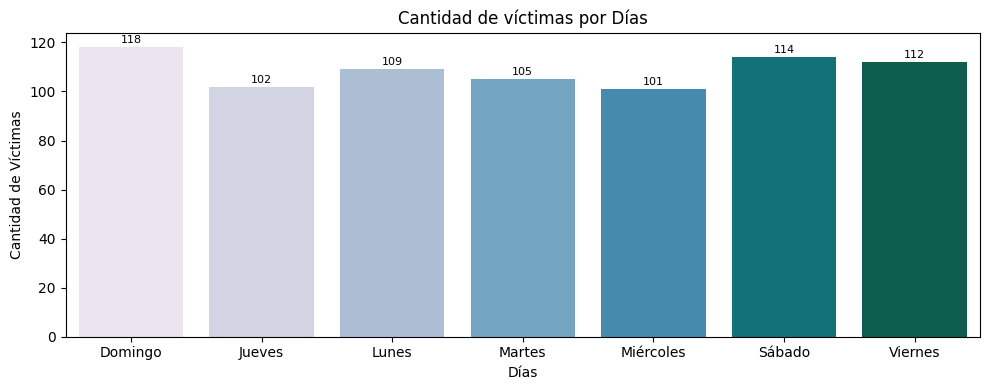

Días ordenados de Mayor a Menos:

  Dias_Nombres_Hechos  N°_Victimas
0             Domingo          118
1              Sábado          114
2             Viernes          112
3               Lunes          109
4              Martes          105
5              Jueves          102
6           Miércoles          101

Top 3 de Días con Mayor cantidad de Víctimas:

  Dias_Nombres_Hechos  N°_Victimas
0             Domingo          118
1              Sábado          114
2             Viernes          112

Datos estadísticos:
       N°_Victimas
count     7.000000
mean    108.714286
std       6.369571
min     101.000000
25%     103.500000
50%     109.000000
75%     113.000000
max     118.000000


In [46]:
# Se grafica
plt.figure(figsize=(10, 4))

# Modificar la línea de código para quitar el FutureWarning
ax = sns.barplot(x='Dias_Nombres_Hechos', y='N°_Victimas', data=victimas_dia, hue='Dias_Nombres_Hechos', palette="PuBuGn", legend=False)
ax.set_title('Cantidad de víctimas por Días')
ax.set_xlabel('Días')
ax.set_ylabel('Cantidad de Víctimas')

# Agregar etiquetas de número de víctimas en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Se muestra el gráfico
plt.tight_layout()
plt.show()

print(f'Días ordenados de Mayor a Menos:\n\n{victimas_dia_ordenada}\n')
print(f'Top 3 de Días con Mayor cantidad de Víctimas:\n\n{top_3_dia_victimas}\n')
print(f'Datos estadísticos:\n{victimas_dia.describe()}')


**Observaciones:**
- La distribución de víctimas por día de la semana muestra que los días con mayor cantidad de víctimas son Domingo, Sábado y Viernes. .Se podría explorar la posibilidad de factores externos como eventos deportivos, sociales o condiciones meteorológicas que podrían contribuir a la variación en la cantidad de víctimas. Identificar estas causas potenciales podría ser clave para diseñar estrategias de prevención.
- La media de víctimas por día es de aproximadamente 108.7.
- El día con la menor cantidad de víctimas es Miércoles (101 víctimas).
- El rango intercuartílico (IQR) indica que el 50% de los días tienen una cantidad de víctimas entre 103.5 y 113.
- Se observa una variación significativa en la cantidad de víctimas a lo largo de la semana, con un pico pronunciado durante los fines de semana (Domingo y Sábado). 
 

### Distribucion de Víctimas por Hora:

In [47]:
# Se agrupa por la cantidad de víctimas por mes
victimas_horas = eda.groupby(['Hora_Hechos'])['N°_Victimas'].sum().reset_index()

In [48]:
# Verificar si hay valores 'SD' en la columna 'Hora_Hechos'
valores_sd = victimas_horas['Hora_Hechos'] == 'SD'
victimas_con_sd = victimas_horas[valores_sd]
victimas_con_sd

,Hora_Hechos,N°_Victimas
24,SD,1


In [49]:
# Eliminar filas con valor 'SD' en la columna 'Hora_Hechos'
victimas_horas = victimas_horas[victimas_horas['Hora_Hechos'] != 'SD']

# Verificar que se hayan eliminado las filas
print(victimas_horas['Hora_Hechos'].value_counts())

Hora_Hechos
0     1
1     1
22    1
21    1
20    1
19    1
18    1
17    1
16    1
15    1
14    1
13    1
12    1
11    1
10    1
9     1
8     1
7     1
6     1
5     1
4     1
3     1
2     1
23    1
Name: count, dtype: int64


In [50]:
# Ordenar de mayor a menor
victimas_hora_ordenanda = victimas_horas.sort_values(by='N°_Victimas', ascending=False)

# Reindexar el DataFrame después de ordenar
victimas_hora_ordenanda = victimas_hora_ordenanda.reset_index(drop=True)

# 3 Meses con mas Victimas
top_3_hora_victimas = victimas_hora_ordenanda.head(3)

# Reindexar el DataFrame después de ordenar
top_3_hora_victimas = top_3_hora_victimas.reset_index(drop=True)


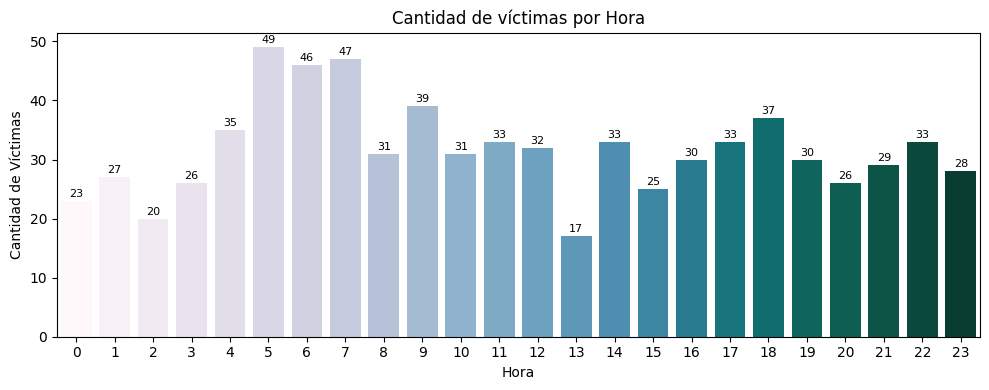

Hora ordenados de Mayor a Menos:

   Hora_Hechos  N°_Victimas
0            5           49
1            7           47
2            6           46
3            9           39
4           18           37
5            4           35
6           22           33
7           11           33
8           14           33
9           17           33
10          12           32
11           8           31
12          10           31
13          16           30
14          19           30
15          21           29
16          23           28
17           1           27
18          20           26
19           3           26
20          15           25
21           0           23
22           2           20
23          13           17

Top 3 de Hora con Mayor cantidad de Víctimas:

  Hora_Hechos  N°_Victimas
0           5           49
1           7           47
2           6           46

Datos estadísticos:
       N°_Victimas
count    24.000000
mean     31.666667
std       7.872167
min      17.0

In [51]:
# Se grafica
plt.figure(figsize=(10, 4))

# Modificar la línea de código para quitar el FutureWarning
ax = sns.barplot(x='Hora_Hechos', y='N°_Victimas', data=victimas_horas, hue='Hora_Hechos', palette="PuBuGn", legend=False)
ax.set_title('Cantidad de víctimas por Hora')
ax.set_xlabel('Hora')
ax.set_ylabel('Cantidad de Víctimas')

# Agregar etiquetas de número de víctimas en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Se muestra el gráfico
plt.tight_layout()
plt.show()

print(f'Hora ordenados de Mayor a Menos:\n\n{victimas_hora_ordenanda}\n')
print(f'Top 3 de Hora con Mayor cantidad de Víctimas:\n\n{top_3_hora_victimas}\n')
print(f'Datos estadísticos:\n{victimas_horas.describe()}')


**Observaciones:**

- La hora con la mayor cantidad de víctimas es 5:00 AM, seguida por 7:00 AM y 6:00 AM. Estas horas podrían ser consideradas como períodos críticos en los cuales ocurren más siniestros viales. La hora que menos Victimas posee es la 13 hora.

- La distribución muestra una variabilidad significativa en la cantidad de víctimas a lo largo del día. Se observa que las horas tempranas de la mañana, durante el tráfico matutino, tienen una alta incidencia de siniestros.

### Relacion entre Dia y hora que se producen los incidentes:

In [52]:
#Agrupa los datos en cantidad de victimas por dia de la semana y horas 
victimas_dia_hora = eda.groupby(['Dias_Nombres_Hechos', "Hora_Hechos"])['N°_Victimas'].sum().reset_index()
victimas_dia_hora.head()

,Dias_Nombres_Hechos,Hora_Hechos,N°_Victimas
0,Domingo,0,4
1,Domingo,1,3
2,Domingo,2,4
3,Domingo,3,6
4,Domingo,4,11


In [53]:
# Secuentan los valores de la columna
eda['Dias_Nombres_Hechos'].value_counts() 


Dias_Nombres_Hechos
Lunes        107
Sábado       106
Domingo      106
Viernes      102
Martes       101
Miércoles     99
Jueves        96
Name: count, dtype: int64

In [54]:
# Filtrar las filas donde 'Hora_Hechos' no es 'SD' y visualizacion del DataFrame
victimas_dia_hora = victimas_dia_hora[victimas_dia_hora["Hora_Hechos"] != 'SD']
victimas_dia_hora['Hora_Hechos'].value_counts()

Hora_Hechos
0     7
15    7
23    7
22    7
21    7
20    7
19    7
18    7
17    7
16    7
12    7
10    7
9     7
8     7
7     7
6     7
5     7
4     7
3     7
11    6
1     6
13    6
14    6
2     5
Name: count, dtype: int64

In [55]:
# Define el orden de los días de la semana
orden_dias_semana = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]

# Crea una columna 'Orden_dia_semana' en el DataFrame para representar el orden numérico de los días de la semana
victimas_dia_hora['Orden_dia_semana'] = victimas_dia_hora['Dias_Nombres_Hechos'].apply(lambda x: orden_dias_semana.index(x))

# Ordena el DataFrame según el orden numérico de los días de la semana
victimas_dia_hora = victimas_dia_hora.sort_values(by='Orden_dia_semana')

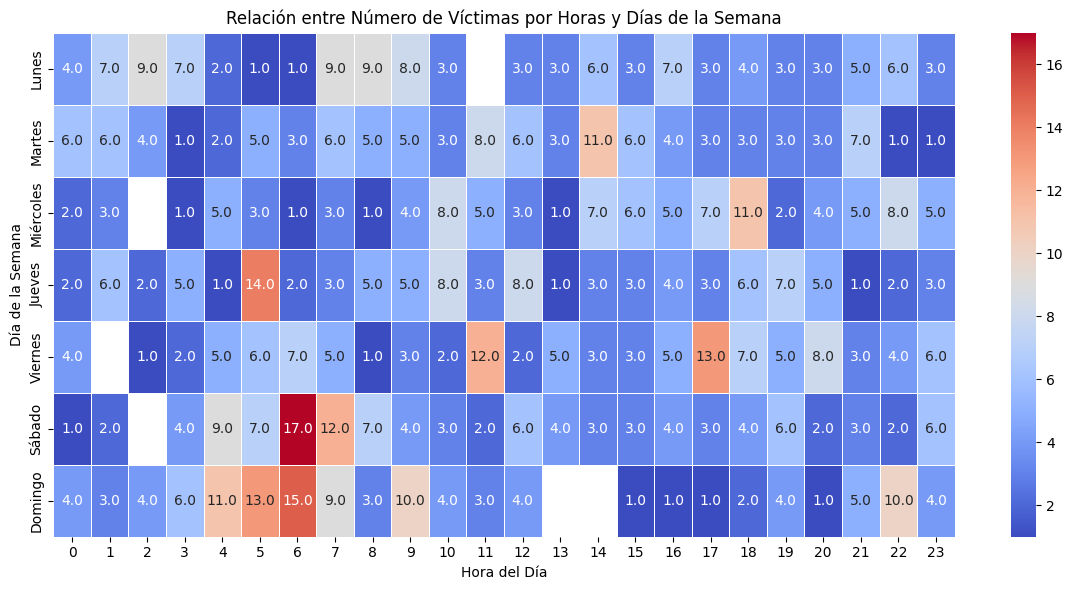

In [56]:
# Crear una tabla pivot para los datos
tabla_pivot = victimas_dia_hora.pivot_table(index= 'Dias_Nombres_Hechos', columns='Hora_Hechos', values='N°_Victimas', aggfunc='sum')
tabla_pivot = tabla_pivot.reindex(orden_dias_semana)

# Crear un mapa de calor (heatmap)
plt.figure(figsize=(12, 6))
sns.heatmap(tabla_pivot, cmap='coolwarm', annot=True, fmt='.1f', linewidths=0.5)

# Configurar etiquetas y título
plt.xlabel('Hora del Día')
plt.ylabel('Día de la Semana')
plt.title('Relación entre Número de Víctimas por Horas y Días de la Semana')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**Observacion:**
- Se observa una alta relacion entrelos dias Domingos entre el rango horario de las (04:00 - 07:00), Sabados entre el rango horario de las (06:00 - 08:00), el dia Jueves se observa un pico entre (04:00 05:00) como el dia viernes a las horas(11:00 y 17:00) como se vio anteriormente que estos dias y a esas horas son los que se registras mayores Numeros de Incidentes. Sepuede relacionar con la horaria de salida de zonas de entretenimiento y con el horario de inicio del dia de otros ciudadanos.

***
### Edad de las Victimas de Siniestros Viales

In [57]:
# Se genera una variable para obtener los datos estadisticos
edad_victimas = eda['Edad']

In [58]:
# Observar los subniveles que posee la variable
print(edad_victimas.value_counts())
print(f'\nCantidad de valores nulos : {edad_victimas.isna().sum()}')

Edad
30    28
29    24
23    24
28    20
27    20
24    18
21    17
32    16
39    16
20    16
60    15
35    15
26    15
22    14
36    14
25    13
37    13
43    13
41    13
34    12
40    11
33    11
73    11
44    11
31    11
57    10
38    10
58    10
80    10
19    10
70     9
47     9
49     9
50     9
55     8
56     8
76     7
18     7
53     7
42     7
59     7
75     7
78     7
51     6
46     6
61     6
82     5
16     5
84     5
17     5
67     5
87     5
45     5
54     4
83     4
79     4
72     4
69     3
68     3
71     3
74     3
81     3
48     3
77     2
86     2
62     2
1      2
91     2
15     2
66     2
10     2
65     2
63     2
52     2
4      2
64     2
5      1
92     1
95     1
12     1
11     1
13     1
85     1
7      1
88     1
Name: count, dtype: Int64

Cantidad de valores nulos : 53


In [59]:
# Contar los valores nulos y no nulos en la columna 'Edad'
conteo_valores = eda['Edad'].isnull().value_counts(normalize=True) * 100

# Imprimir el resultado
print("Total de datos en 'Edad':", len(eda['Edad']))
print("Porcentaje de valores no nulos:", f"{conteo_valores[False]:.2f}%")
print("Porcentaje de valores nulos:", f"{conteo_valores[True]:.2f}%")



Total de datos en 'Edad': 717
Porcentaje de valores no nulos: 92.61%
Porcentaje de valores nulos: 7.39%


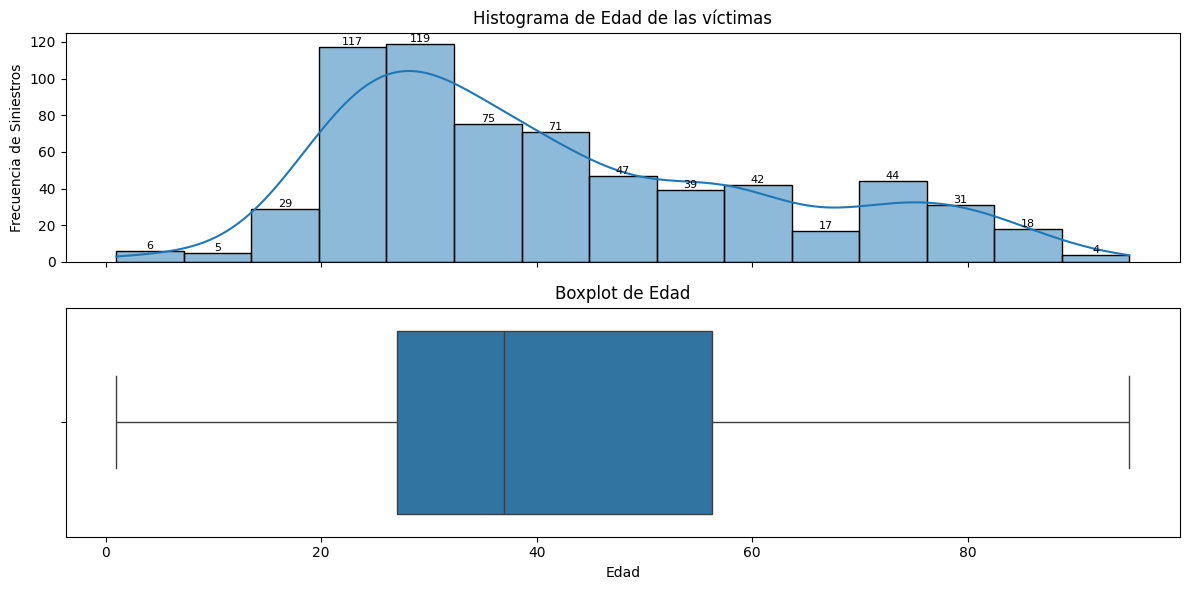

Datos estadisticos: count        664.0
mean     42.167169
std      19.788034
min            1.0
25%           27.0
50%           37.0
75%          56.25
max           95.0
Name: Edad, dtype: Float64


In [60]:
# Se crea una figura con un solo eje x compartido para tener dos gráficos en uno
fig, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# Se grafica el histograma de la edad
sns.histplot(eda['Edad'], kde=True, ax=ax[0]) #se agrega la línea de suavizado
ax[0].set_title('Histograma de Edad de las víctimas') ; ax[0].set_ylabel('Frecuencia de Siniestros')

# Agregar etiquetas de datos en el histograma
for p in ax[0].patches:
    ax[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8, color='black')

# Se grafica el boxplot de la edad
sns.boxplot(x=eda['Edad'], ax=ax[1])
ax[1].set_title('Boxplot de Edad') ; ax[1].set_xlabel('Edad')

# Se ajusta y muestra el gráfico
plt.tight_layout()
plt.show()
print(f'Datos estadisticos: {edad_victimas.describe()}')

**Observaciones:**

- Total de datos en 'Edad'es de  717, el porcentaje de valores no nulos (92.61%) y el Porcentaje de valores nulos (7.39%)
Edad Promedio de las Víctimas es de aproximadamente 42.17 años, Desviación Estándar es de alrededor de 19.79, lo que indica cierta variabilidad en las edades.
- La distribución de edades esta sesgada hacia la derecha, ya que la media es mayor que la mediana. Esto sugiere que hay algunas víctimas con edades significativamente más altas que la mayoría.
- La diferencia entre la edad mínima y la máxima es bastante amplia (1 a 95 años), lo que indica una diversidad en las edades de las víctimas.
- La mayoría de las víctimas parecen concentrarse en rangos de edad más bajos, ya que los percentiles 25% y 50% son relativamente bajos. Sin embargo, el percentil 75% indica que hay algunas víctimas mayores de 56.25 años. No se observan valores 'Outliers'

***
### Poblacion:

In [61]:
# Se carga el Excel en DataFrame en una Variable
area_bs_as = pd.read_excel('Data/comunas_barrios_area.xlsx')

In [62]:
# Visualizacion del DataFrame
area_bs_as.head()

,ID,OBJETO,COMUNAS,BARRIOS,PERIMETRO,AREA
0,1,LIMITE COMUNAL,2,RECOLETA,21452.838648,6.317265e+06
1,2,LIMITE COMUNAL,5,ALMAGRO - BOEDO,12323.432479,6.660603e+06
2,3,LIMITE COMUNAL,6,CABALLITO,10990.964471,6.851029e+06
3,4,LIMITE COMUNAL,7,FLORES - PARQUE CHACABUCO,17972.257870,1.242290e+07
4,5,LIMITE COMUNAL,9,LINIERS - MATADEROS - PARQUE AVELLANEDA,21411.738344,1.650531e+07


In [63]:
# Se eliminan columnas que no se van a utilizar
area_bs_as = area_bs_as.drop(columns={'ID', 'OBJETO', 'BARRIOS', 'PERIMETRO'}, axis=1)

In [64]:
# Realizar la fusión (merge) utilizando las columnas 'Comuna' y 'COMUNAS'
eda = eda.merge(area_bs_as, left_on='Comuna', right_on='COMUNAS' )

In [65]:
# Se eliminan columnas que no se van a utilizar
area_bs_as = area_bs_as.drop(columns={'COMUNAS'}, axis=1)

In [66]:
# Se modifica el nombre de la columna AREA
eda = eda.rename(columns={'AREA':'Area'})

In [67]:
# Se genera una nueva columna con la densidad por metros cuadradado
eda['Densidad_Poblacion'] = eda['Poblacion']/eda['Area']

In [68]:
# Se agrupan por comuna para tener la suma de Victimas
densidad = eda.groupby('Comuna')[['Poblacion', 'Area', 'Densidad_Poblacion', 'N°_Victimas']].sum().reset_index()
densidad

,Comuna,Poblacion,Area,Densidad_Poblacion,N°_Victimas
0,1,23554203.0,1.654895e+09,1.323674,101
1,2,3743000.0,1.579316e+08,0.592503,25
2,3,8867098.0,2.937556e+08,1.388523,48
3,4,18865911.0,1.713087e+09,0.870012,85
4,5,4113032.0,1.465333e+08,0.617516,22
5,6,4066612.0,1.507226e+08,0.593577,24
6,7,14917634.0,7.702199e+08,1.200817,66
7,8,15185483.0,1.488532e+09,0.683510,71
8,9,12795375.0,1.237898e+09,0.775228,79
9,10,5108460.0,3.796967e+08,0.403622,32


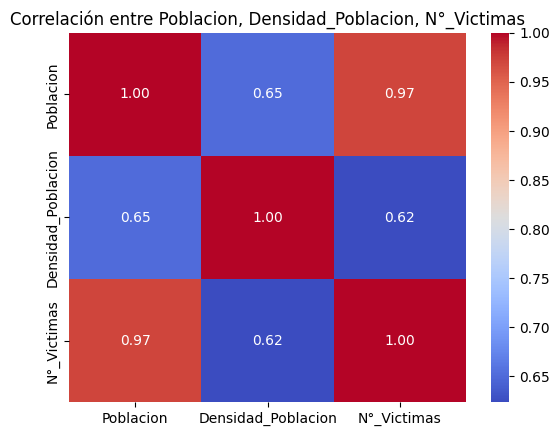

,Poblacion,Densidad_Poblacion,N°_Victimas
Poblacion,1.000000,0.650337,0.971730
Densidad_Poblacion,0.650337,1.000000,0.623628
N°_Victimas,0.971730,0.623628,1.000000


In [69]:
# Calcular la matriz de correlación
correlation_matrix = densidad[['Poblacion', 'Densidad_Poblacion', 'N°_Victimas']].corr()

# Visualizar la matriz de correlación usando un mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre Poblacion, Densidad_Poblacion, N°_Victimas')
plt.show()
correlation_matrix


In [70]:
# Se ordena el DataFrame por Poblacion
densidad_ordenado = densidad.sort_values(by=['Poblacion', 'Densidad_Poblacion', 'N°_Victimas'], ascending=False)
densidad_ordenado

,Comuna,Poblacion,Area,Densidad_Poblacion,N°_Victimas
0,1,23554203.0,1.654895e+09,1.323674,101
3,4,18865911.0,1.713087e+09,0.870012,85
7,8,15185483.0,1.488532e+09,0.683510,71
6,7,14917634.0,7.702199e+08,1.200817,66
8,9,12795375.0,1.237898e+09,0.775228,79
12,13,9438680.0,5.885285e+08,0.641510,40
2,3,8867098.0,2.937556e+08,1.388523,48
13,14,8396928.0,5.862972e+08,0.529913,41
11,12,8342646.0,6.072661e+08,0.535784,43
14,15,8208405.0,6.445303e+08,0.573097,47


**Observaciones:**
- La correlación entre la población y el número de víctimas es muy alta (0.971730). Esto sugiere una fuerte relación positiva: a medida que aumenta la población de una comuna, tiende a haber un aumento en el número de víctimas.
- Es probable que las comunas más grandes tengan más eventos y actividades, lo que podría aumentar las oportunidades de incidentes y, por lo tanto, el número de víctimas.
- La correlación entre la densidad de población y el número de víctimas también es significativa (0.623628), aunque menos fuerte que la correlación con la población.
- Esto sugiere que, además del tamaño de la población, la densidad de la población también puede tener un impacto en el número de víctimas. Comunas más densamente pobladas podrían enfrentar desafíos adicionales en términos de seguridad o recursos disponibles.

***
### 2_ Variables Categoricas

### Ubicacion de los incidentes:
Se crea un mapa para identificar los incidentes de manera interactiva.

In [71]:

# Filtrar las filas que tienen información de latitud y longitud
incidentes_con_coordenadas = eda.dropna(subset=['Latitud', 'Longitud'])

# Crear un mapa centrado en Buenos Aires
mapa_buenos_aires = folium.Map(location=[-34.6118, -58.4173], zoom_start=12)

# Agregar un grupo de marcadores para los incidentes
marker_cluster = MarkerCluster().add_to(mapa_buenos_aires)

# Iterar sobre los incidentes y agregar marcadores al mapa
for index, incidente in incidentes_con_coordenadas.iterrows():
    folium.Marker(
        location=[incidente['Latitud'], incidente['Longitud']],
        popup=f"Incidente vial {incidente['Id']}",
    ).add_to(marker_cluster)

# Guardar el mapa como un archivo HTML
mapa_buenos_aires.save('mapa_incidentes_buenos_aires.html')

# Mostrar el mapa en el notebook
mapa_buenos_aires


### Distribucion de Siniestros por Comuna:

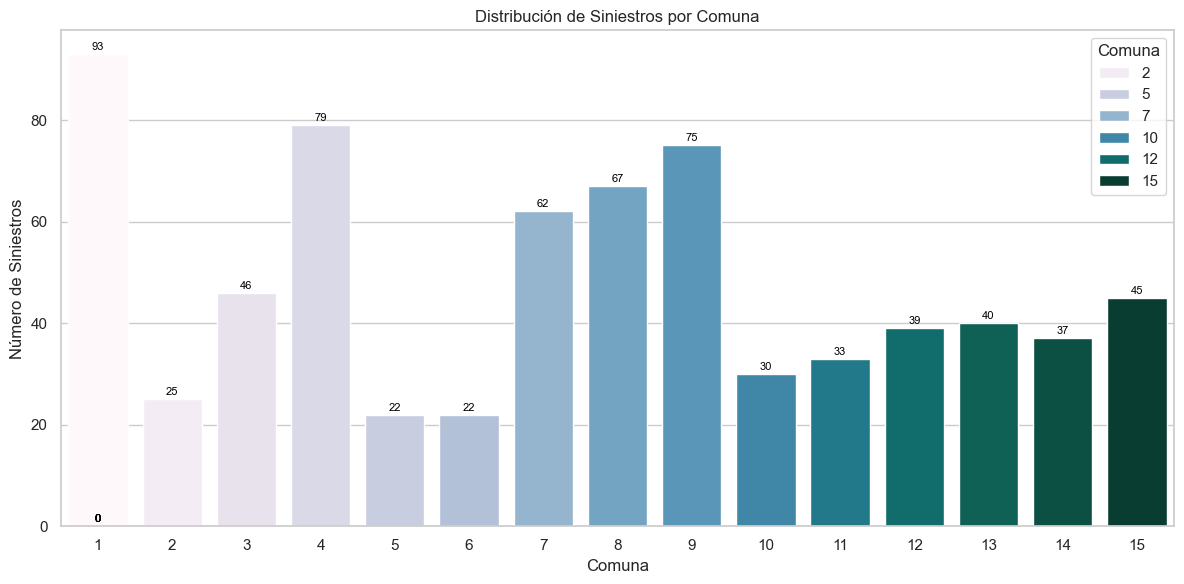

Barrios que componen las comunas:


,Comuna,Barrios,N°_Victimas
0,1,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RETIRO - SAN NICOLAS - SAN TELMO,93
3,4,BARRACAS - BOCA - NUEVA POMPEYA - PARQUE PATRICIOS,79
8,9,LINIERS - MATADEROS - PARQUE AVELLANEDA,75
7,8,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI,67
6,7,FLORES - PARQUE CHACABUCO,62


In [72]:
# Agrupar por comuna y contar el número de siniestros en cada una
siniestros_por_comuna = eda.groupby('Comuna')['N°_Victimas'].count().reset_index()

# Agrupar por comuna, nombre de barrios que lo componen y contar el número de siniestros en cada una
siniestros_por_comuna_barrio = eda.groupby(['Comuna', 'Barrios'])['N°_Victimas'].count().reset_index()

# Obtener las 5 filas con el conteo más alto
top_5_siniestros = siniestros_por_comuna_barrio.nlargest(5, 'N°_Victimas')

# Ordenar las comunas por número de siniestros de mayor a menor
siniestros_por_comuna = siniestros_por_comuna.sort_values(by='N°_Victimas', ascending=False)

# Configurar el estilo de Seaborn
sns.set_theme(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Comuna', y='N°_Victimas', data=siniestros_por_comuna, palette='PuBuGn', hue='Comuna', dodge=False)
ax.set_title('Distribución de Siniestros por Comuna')
ax.set_xlabel('Comuna')
ax.set_ylabel('Número de Siniestros')

# Añadir etiquetas con el número de siniestros en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

print(f'Barrios que componen las comunas:')
siniestros_por_comuna_barrio
top_5_siniestros


**Obseevacion:**
Las 5 primeras comunas con mas incidentes son la 1, 4, 9, 8 y 7. 

### Distribucion del Tipo de Calle donde ocurren los Siniestros:
Se crea un grafico para ubicar cual Tipo de Calle es la que mas ocurren Siniestros Viales.

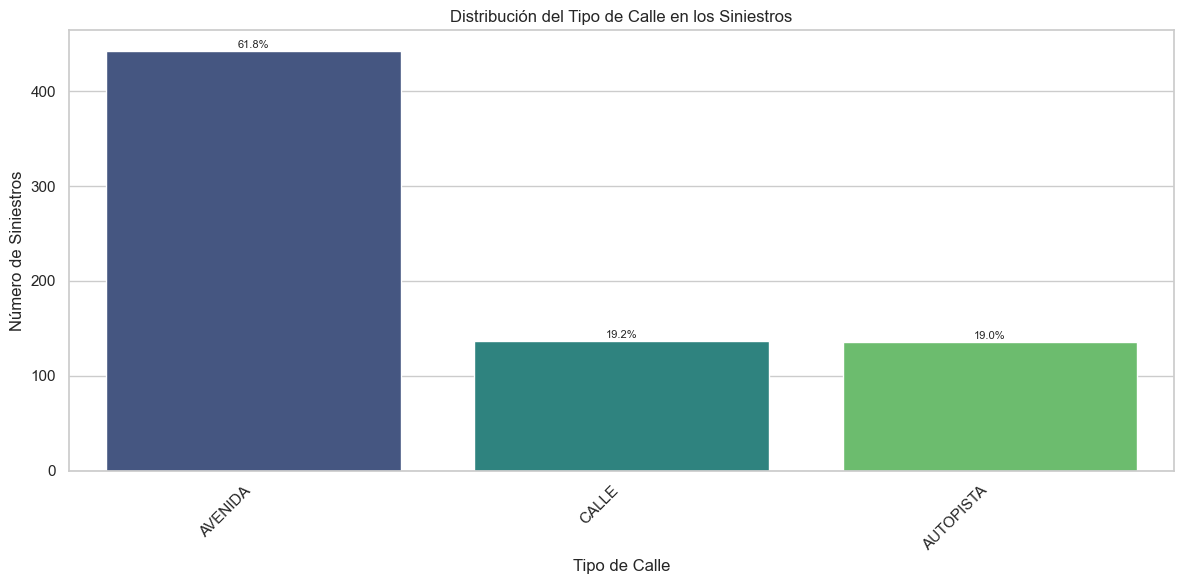

Tipo_De_Calle
AVENIDA      442
CALLE        137
AUTOPISTA    136
Name: count, dtype: int64

In [73]:
# Crear una copia del DataFrame para evitar modificar el original
eda_modificado = eda.copy()

# Reemplazar 'GRAL PAZ' con 'AUTOPISTA'
eda_modificado['Tipo_De_Calle'] = eda_modificado['Tipo_De_Calle'].replace('GRAL PAZ', 'AUTOPISTA')

# Contar la frecuencia de cada tipo de calle
tipo_calle_distribution = eda_modificado['Tipo_De_Calle'].value_counts()

# Calcular el porcentaje
porcentaje = tipo_calle_distribution / len(eda_modificado) * 100

# Se grafica
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=tipo_calle_distribution.index, y=tipo_calle_distribution.values, palette="viridis", hue=tipo_calle_distribution.index, dodge=False, legend=False)

# Agregar porcentaje en cada barra
for i, v in enumerate(tipo_calle_distribution):
    barplot.text(i, v + 1, f'{porcentaje.iloc[i]:.1f}%', ha='center', va='bottom', fontsize=8)


plt.title('Distribución del Tipo de Calle en los Siniestros')
plt.xlabel('Tipo de Calle')
plt.ylabel('Número de Siniestros')

# Rotar las etiquetas del eje x para mayor claridad
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

tipo_calle_distribution

***Observaciones:**

- Los siniestros viales ocurren con una gran frecuencia en Avenidas, superando a la suma de calle y autopistas juntas.
Se agreago Av Gral PAZ a autopista, como figura en la pagina oficial de la Ciudad de Buenos Aires.


### Distribucion por Sexo de las Victmas de Siniestros:
Se genera un grafico para comparar la cantidad y frecuencia de la participacion de las victimas por sexo en los siniestros.

In [74]:
# Contar las victimas por sexo en una variable
victimas_sexo = eda['Sexo'].value_counts()
victimas_sexo

Sexo
MASCULINO    545
FEMENINO     166
SD             4
Name: count, dtype: int64

In [75]:
# Eliminar la categoría 'SD' si está presente
victimas_sexo = victimas_sexo[victimas_sexo.index != 'SD']

# Mostrar el resultado
victimas_sexo

Sexo
MASCULINO    545
FEMENINO     166
Name: count, dtype: int64

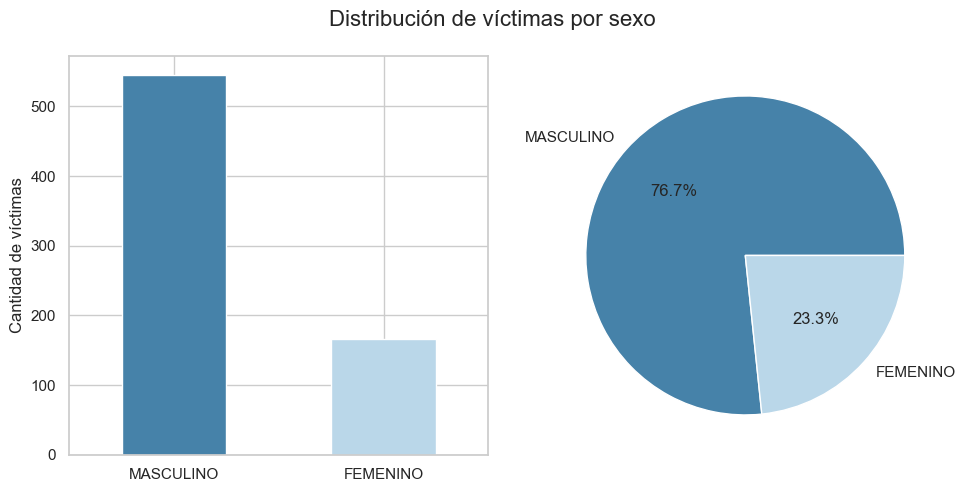

In [76]:
# Genera el grafico
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  
victimas_sexo.plot(kind='bar', color=['#4682A9', '#BAD7E9'])
plt.xlabel('')
plt.ylabel('Cantidad de víctimas',fontsize= 12)
plt.xticks(rotation= 0,fontsize= 11) 

plt.subplot(1, 2, 2)  
victimas_sexo.plot(kind='pie', autopct='%1.1f%%', colors=['#4682A9', '#BAD7E9'])
plt.ylabel('')

plt.suptitle('Distribución de víctimas por sexo', fontsize=16)

plt.tight_layout() 
plt.show()

### Porcentaje y cantidad de Rol de Victimas en incidentes:
Se genera un grafico de torta para mostrar el porcentaje de cada rol de víctima en los incidentes.

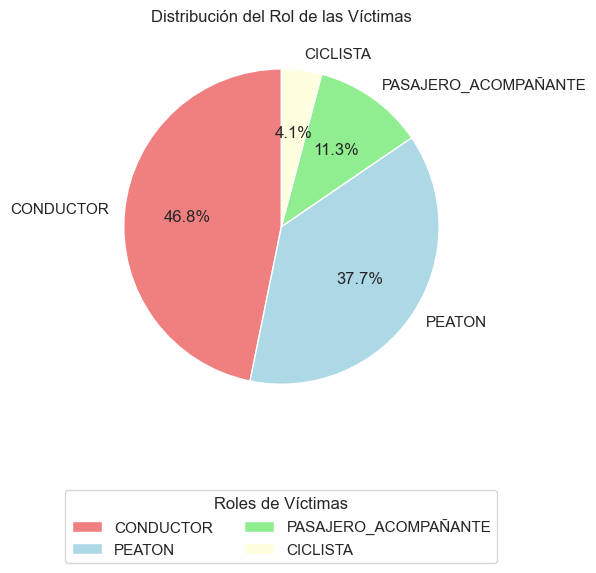

Rol_Victima
CONDUCTOR               330
PEATON                  266
PASAJERO_ACOMPAÑANTE     80
CICLISTA                 29
Name: count, dtype: int64

In [77]:
# Filtrar las filas que tienen información sobre el rol de la víctima
roles_victimas = eda['Rol_Victima'].value_counts()
roles_victimas = roles_victimas[roles_victimas.index != 'SD']

# Colores para las etiquetas
colores = ['lightcoral', 'lightblue', 'lightgreen', 'lightyellow']

# Crear el gráfico de torta
plt.figure(figsize=(6, 6))
pie_chart = plt.pie(roles_victimas, labels=roles_victimas.index, autopct='%1.1f%%', startangle=90, colors=colores)

# Crear un cuadro de leyenda
plt.legend(roles_victimas.index, title="Roles de Víctimas", bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=2)

plt.title('Distribución del Rol de las Víctimas')
plt.tight_layout() 
plt.show()
roles_victimas

**Observacion:**

- El rol más común es el de conductor, seguido por peatón.
- La frecuencia de pasajeros o acompañantes es significativamente menor en comparación con conductores y peatones.
- La categoría de ciclistas tiene una frecuencia más baja en comparación con los demás roles.

### Frecuencia de Participantes en incidentes:
Se grafica la relacion entre incidentes de Medios de movilidad involucrados en los Siniestros.

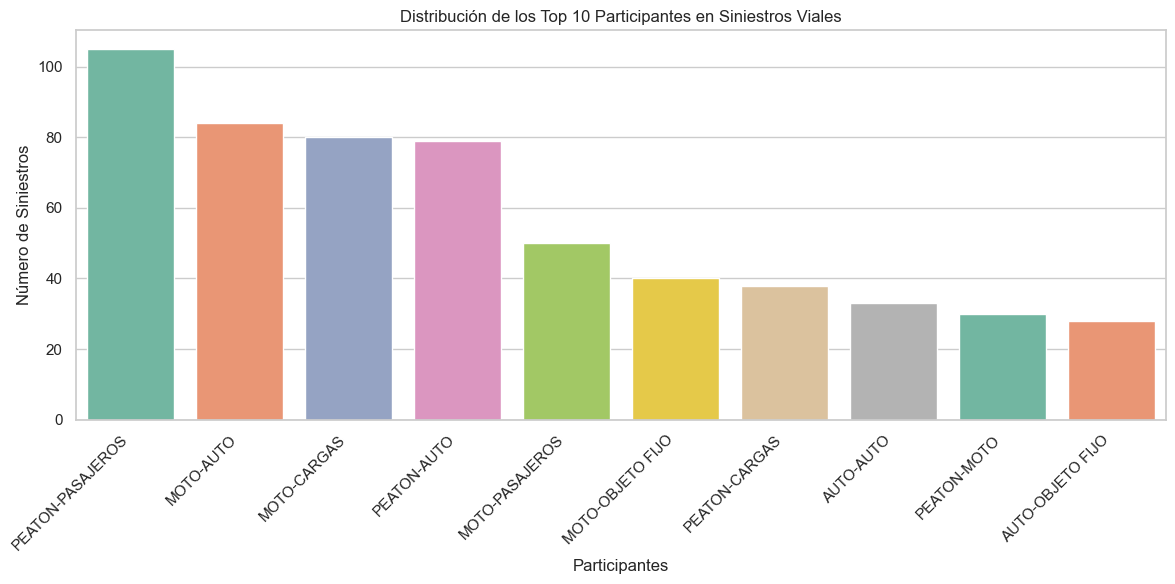

Particpantes en incidentes:


Participantes
PEATON-PASAJEROS       105
MOTO-AUTO               84
MOTO-CARGAS             80
PEATON-AUTO             79
MOTO-PASAJEROS          50
MOTO-OBJETO FIJO        40
PEATON-CARGAS           38
AUTO-AUTO               33
PEATON-MOTO             30
AUTO-OBJETO FIJO        28
MOTO-MOTO               25
MULTIPLE                17
AUTO-CARGAS             15
BICICLETA-CARGAS        10
AUTO-PASAJEROS          10
MOTO-SD                  9
BICICLETA-AUTO           8
BICICLETA-PASAJEROS      8
PEATON-BICICLETA         5
CARGAS-CARGAS            4
SD-SD                    4
AUTO-SD                  4
PASAJEROS-PASAJEROS      3
PEATON-SD                3
MOTO-BICICLETA           2
MOVIL-CARGAS             2
MOTO-MOVIL               2
PEATON_MOTO-MOTO         2
MOTO-OTRO                2
SD-AUTO                  2
BICICLETA-OTRO           1
CARGAS-AUTO              1
CARGAS-OBJETO FIJO       1
MOVIL-PASAJEROS          1
AUTO-MOVIL               1
PASAJEROS-AUTO           1
SD-MOTO       

In [78]:
# Contar la frecuencia de cada acusado
participantes_distribution = eda['Participantes'].value_counts()
participantes_distribution = participantes_distribution[participantes_distribution != 'PEATON-PASAJEROS']

# Filtrar las filas que tienen información sobre los participantes
top_10_participantes_distribution = eda['Participantes'].value_counts().nlargest(10)
top_10_participantes_distribution = top_10_participantes_distribution[top_10_participantes_distribution != 'PEATON-PASAJEROS']
# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_participantes_distribution.index, y=top_10_participantes_distribution.values, palette="Set2", hue=top_10_participantes_distribution.index, dodge=False, legend=False)

# Ajustar etiquetas y leyendas
plt.title('Distribución de los Top 10 Participantes en Siniestros Viales')
plt.xlabel('Participantes')
plt.ylabel('Número de Siniestros')
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout() 
plt.show()


print(f'Particpantes en incidentes:')
participantes_distribution


**Observaciones:**

- Combinaciones frecuentes: La combinación más frecuente es "PEATON-PASAJEROS" seguida de cerca por "MOTO-AUTO" y "MOTO-CARGAS". Estas combinaciones sugieren situaciones en las que peatones interactúan con pasajeros, motocicletas con automóviles, y motocicletas con vehículos de carga.


### Frecuencia de Victimas por Medio de Movilidad:
Se realiza un grafico de barras con el total de victimas por medio de movilidad para tener una idea visual.

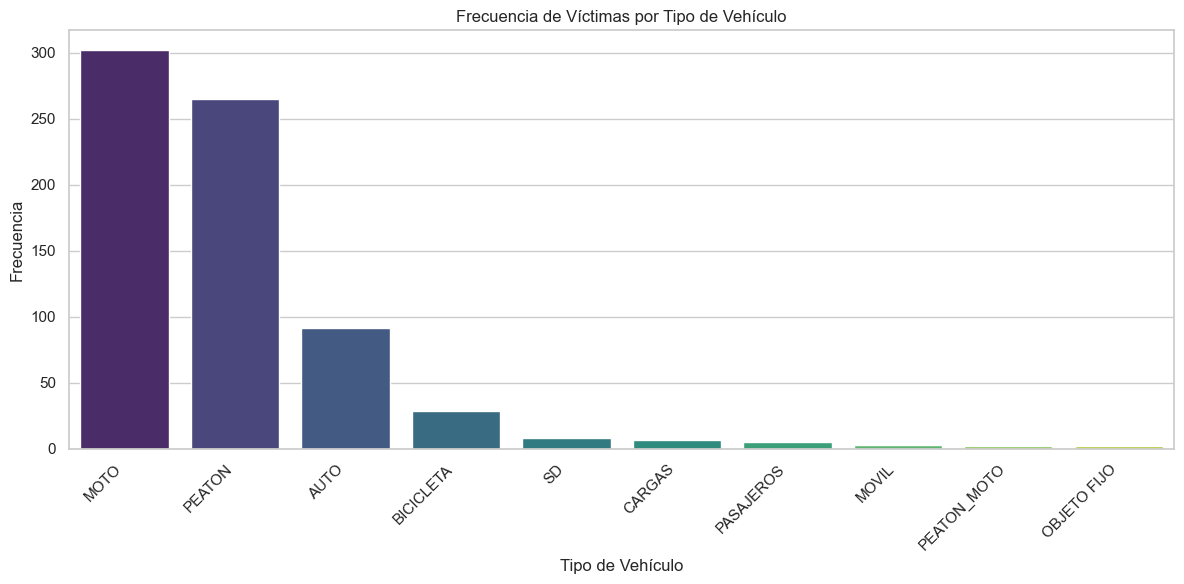

Victima
MOTO           302
PEATON         265
AUTO            92
BICICLETA       29
SD               8
CARGAS           7
PASAJEROS        5
MOVIL            3
PEATON_MOTO      2
OBJETO FIJO      2
Name: count, dtype: int64


In [79]:
# Obtener la frecuencia de cada tipo de vehículo
frecuencia_victimas = eda['Victima'].value_counts()

# Cantidad de Acusados
acusados = eda['Acusado'].value_counts()

# Cantidad de Victimas
victimas = eda['Victima'].value_counts()

# Se grafica
plt.figure(figsize=(12, 6))
sns.barplot(x=frecuencia_victimas.index, y=frecuencia_victimas.values, palette="viridis", hue=frecuencia_victimas.index)
plt.title('Frecuencia de Víctimas por Tipo de Vehículo')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Frecuencia')

# Rotar las etiquetas del eje x para mayor claridad
plt.xticks(rotation=45, ha='right')  

# Mostrar el gráfico
plt.tight_layout()
plt.show()

print(victimas)

**Observaciones:**
- Como se detalla en el grafico la mayoia de victimas que sufren Siniestros Viales son las motos, seguido de peatones, lo que nos indica que en la movilidad sin carroceria es mas peligroso el transito por la ciuda.

***
### Exportar el DataFrame

In [80]:
# Guardar DataFrame transformado
eda.to_excel('eda_general.xlsx', index=False)

***
***